In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [3]:
import requests

# Replace these values with your actual client ID, client secret, and access token
client_id = '121558'
client_secret = '5415d151f56de941ba6bdd1a07bfda0aa28e2695'
access_token = '8d2e2c4a2fdf3c7d03e991cc008ad8635ee5de6d'

# URL of the Strava API endpoint to retrieve club details
club_id = '1217829'
club_url = f'https://www.strava.com/api/v3/clubs/{club_id}'

# Set up headers with the access token for authentication
headers = {'Authorization': f'Bearer {access_token}'}

# Make a GET request to the club endpoint
response = requests.get(club_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Extract club data from the response
    club_data = response.json()
    print("Club Name:", club_data['name'])
    print("Club Description:", club_data['description'])
    print("Club Member Count:", club_data['member_count'])
    # You can extract other relevant information here
else:
    print("Error:", response.status_code, response.text)


Club Name: BMSCE NCC
Club Description: BMSCE NCC FSFS/2/C
Club Member Count: 21


In [3]:
recent_activity_url = f'https://www.strava.com/api/v3/clubs/{club_id}/activities/'

# Set up headers with the access token for authentication
headers = {'Authorization': f'Bearer {access_token}'}

# Make a GET request to the recent activity endpoint
response = requests.get(recent_activity_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Extract recent activity data from the response
    recent_activity_data = response.json()

    # Process and print recent activity data
    print(recent_activity_data)
else:
    print("Error:", response.status_code, response.text)

[{'resource_state': 2, 'athlete': {'resource_state': 2, 'firstname': 'Keertana', 'lastname': 'G.'}, 'name': 'Night run\n(15/02/2024)', 'distance': 2016.0, 'moving_time': 564, 'elapsed_time': 727, 'total_elevation_gain': 12.2, 'type': 'Run', 'sport_type': 'Run', 'workout_type': 0}, {'resource_state': 2, 'athlete': {'resource_state': 2, 'firstname': 'Parnika', 'lastname': 'B.'}, 'name': 'Evening run-2 (15/02/2024)', 'distance': 2008.2, 'moving_time': 903, 'elapsed_time': 903, 'total_elevation_gain': 10.1, 'type': 'Run', 'sport_type': 'Run', 'workout_type': 0}, {'resource_state': 2, 'athlete': {'resource_state': 2, 'firstname': 'Parnika', 'lastname': 'B.'}, 'name': 'Evening run-1 (15/02/2024)', 'distance': 1407.1, 'moving_time': 604, 'elapsed_time': 604, 'total_elevation_gain': 6.2, 'type': 'Run', 'sport_type': 'Run', 'workout_type': 0}, {'resource_state': 2, 'athlete': {'resource_state': 2, 'firstname': 'Prahladh', 'lastname': 'N.'}, 'name': 'Night 3k (15/02/2024)', 'distance': 3108.4, '

In [6]:
athlete_names = []
activity_names = []
distances = []
moving_times = []
elapsed_times = []
total_elevation_gains = []
activity_types = []
sport_types = []

    # Extract data for each activity
for activity in recent_activity_data:
    athlete_names.append(activity['athlete']['firstname'] + ' ' + activity['athlete']['lastname'])
    activity_names.append(activity['name'])
    distances.append(activity['distance'])
    moving_times.append(activity['moving_time'])
    elapsed_times.append(activity['elapsed_time'])
    total_elevation_gains.append(activity['total_elevation_gain'])
    activity_types.append(activity['type'])
    sport_types.append(activity['sport_type'])

    # Create a pandas DataFrame
df = pd.DataFrame({
        'AthleteName': athlete_names,
        'ActivityName': activity_names,
        'Distance': distances,
        'MovingTime': moving_times,
        'ElapsedTime': elapsed_times,
        'TotalElevationGain': total_elevation_gains,
        'ActivityType': activity_types,
        'SportType': sport_types
    })

    # Display the DataFrame
print(df)

         AthleteName         ActivityName  Distance  MovingTime  ElapsedTime  \
0        Abhishek P.         Morning Walk    1007.1         609          609   
1        Abhishek P.          Morning Run    3322.4         977          977   
2        Keertana G.          Evening Run    1021.3         288          365   
3        Keertana G.          Evening Run    1024.1         286          343   
4            Ravi ..                  Jog    4166.6         511          568   
5           Tilak S.            Let's go!    5007.5        1486         1486   
6        Prahladh N.         Evening 5.5k    5505.3        1584         1629   
7            Ravi ..       Late for class    1387.3         501          507   
8            Ravi ..              To swim    1382.7         385          385   
9            Ravi ..                  Jog    1074.2         356          359   
10           Ravi ..          Evening Run     392.9          86           86   
11           Ravi ..                  Ru

In [13]:
df.tail()

,AthleteName,ActivityName,Distance,MovingTime,ElapsedTime,TotalElevationGain,ActivityType,SportType
25,Prahladh N.,4k inclined,4104.8,1129,1253,46.4,Run,Run
26,Tilak S.,Evening run,2678.5,754,754,60.1,Run,Run
27,Shishu Malnad S.,Warmup,586.6,186,190,8.8,Run,Run
28,Abhishek P.,Evening Run,2024.2,577,629,17.0,Run,Run
29,Keertana G.,Evening Run,1029.6,286,286,4.9,Run,Run


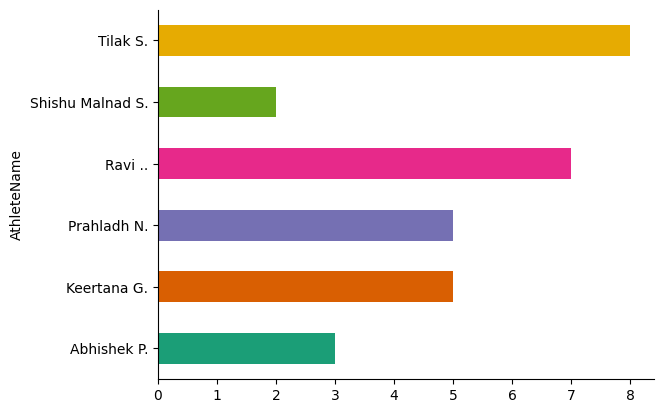

In [20]:
# @title AthleteName

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('AthleteName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.to_csv('recent_activity.csv', index=False)

In [4]:

# URL of the Strava API endpoint to retrieve recent activity for the club
recent_activity_url = f'https://www.strava.com/api/v3/clubs/{club_id}/activities/'

# Set up headers with the access token for authentication
headers = {'Authorization': f'Bearer {access_token}'}

# Initialize an empty list to store all activities
all_activities = []

# Initialize page number
page = 1

# Fetch activities until all pages are retrieved
while True:
    # Make a GET request to the recent activity endpoint with pagination
    response = requests.get(recent_activity_url, headers=headers, params={'page': page})
    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract recent activity data from the response
        recent_activity_data = response.json()
        
        # Check if there are no more activities
        if not recent_activity_data:
            break
        
        # Add activities to the list
        all_activities.extend(recent_activity_data)
        
        # Increment page number for the next request
        page += 1
    else:
        print("Error:", response.status_code, response.text)
        break

# Extract data for all activities
athlete_names = []
activity_names = []
distances = []
moving_times = []
elapsed_times = []
total_elevation_gains = []
activity_types = []
sport_types = []


for activity in all_activities:
    athlete_names.append(activity['athlete']['firstname'] + ' ' + activity['athlete']['lastname'])
    activity_names.append(activity['name'])
    distances.append(activity['distance'])
    moving_times.append(activity['moving_time'])
    elapsed_times.append(activity['elapsed_time'])
    total_elevation_gains.append(activity['total_elevation_gain'])
    activity_types.append(activity['type'])
    sport_types.append(activity['sport_type'])
    
# Create a pandas DataFrame
df = pd.DataFrame({
        'AthleteName': athlete_names,
        'ActivityName': activity_names,
        'Distance': distances,
        'MovingTime': moving_times,
        'ElapsedTime': elapsed_times,
        'TotalElevationGain': total_elevation_gains,
        'ActivityType': activity_types,
        'SportType': sport_types
    })

df['Date'] = df['ActivityName'].str.extract(r'\((.*?)\)')
# Save the DataFrame as a CSV file


DataFrame saved as all_activities.csv and downloaded.


In [5]:

list1=["Manjunath M.", "Keertana G.", "Prahladh N.", "Ravi ..", "Nikhil H.", "Tilak S.", "Niwa D.", "PRAGATHI T.", "Vignesh R."]
list2=["Parnika B.", "Vicky P.", "Kruthika G.", "Pratik J.", "Altamas K.", "SOURABH M.", "Bhargava R.", "Vani V."]
def assign_seniority(name):
    if name in list1:
        return 'Senior'
    elif name in list2:
        return 'Junior'
    else:
        return ''

# Apply function to create Seniority column
df['Seniority'] = df['AthleteName'].apply(assign_seniority)

In [6]:
df.to_csv('all_activities.csv', index=False)



print("DataFrame saved as all_activities.csv and downloaded.")


DataFrame saved as all_activities.csv and downloaded.
